# 直方图-3：二维直方图

### 目标

在本章中，我们将学习查找和绘制2D直方图。这将在以后的章节中有所帮助。

### 介绍

在第一篇文章中，我们计算并绘制了一维直方图。 之所以称为一维，是因为我们仅考虑一个特征，即像素的灰度强度值。 但是在二维直方图中，您要考虑两个特征。 通常，它用于查找颜色直方图，其中两个特征是每个像素的色相和饱和度值。 

已经有一个python示例（samples / python / color_histogram.py）用于查找颜色直方图。 我们将尝试了解如何创建这种颜色直方图，这对于理解诸如直方图反向投影之类的更多主题将很有用。

### OpenCV中的二维直方图

它非常简单，并且使用相同的函数**cv.calcHist**()进行计算。 对于颜色直方图，我们需要将图像从BGR转换为HSV。（请记住，对于一维直方图，我们从BGR转换为灰度）。对于二维直方图，其参数将进行如下修改：

- **channel = [0,1]**，*因为我们需要同时处理H和S平面。*
- **bins = [180,256]** *对于H平面为180，对于S平面为256。*
- **range = [0,180,0,256]** *色相值介于0和180之间，饱和度介于0和256之间。*

现在检查以下代码：

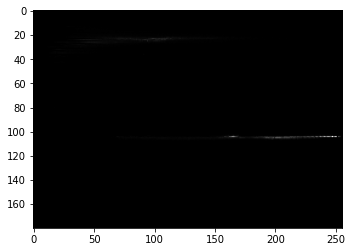

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/home.jpg')
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

plt.imshow(hist, 'gray')

plt.show()

就是这样。

### Numpy中的二维直方图

Numpy还为此提供了一个特定的函数:**np.histogram2d**()。(记住，对于一维直方图我们使用了**np.histogram**())。

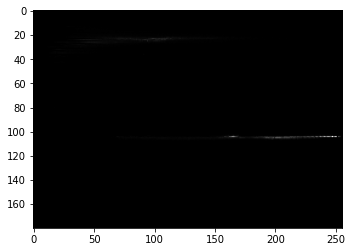

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/home.jpg')
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)

h, s, v = cv.split(hsv)

hist, xbins, ybins = np.histogram2d(h.ravel(),s.ravel(),[180,256],[[0,180],[0,256]])

plt.imshow(hist, 'gray')

plt.show()

第一个参数是H平面，第二个是S平面，第三个是每个箱子的数量，第四个是它们的范围。

现在我们可以检查如何绘制这个颜色直方图。

### 绘制二维直方图
#### 方法1：使用 cv.imshow()

我们得到的结果是尺寸为`80x256`的二维数组。因此，可以使用**cv.imshow**()函数像平常一样显示它们。它将是一幅灰度图像，除非您知道不同颜色的色相值，否则不会对其中的颜色有太多了解。

#### 方法2：使用Matplotlib
我们可以使用matplotlib.pyplot.imshow()函数绘制具有不同颜色图的2D直方图。它使我们对不同的像素密度有了更好的了解。但是，除非您知道不同颜色的色相值，否则乍一看并不能使我们知道到底是什么颜色。我还是更喜欢这种方法。它简单而更好。

> **注意**
使用此功能时，请记住，插值法应采用最近邻以获得更好的结果。

考虑下面的代码： 

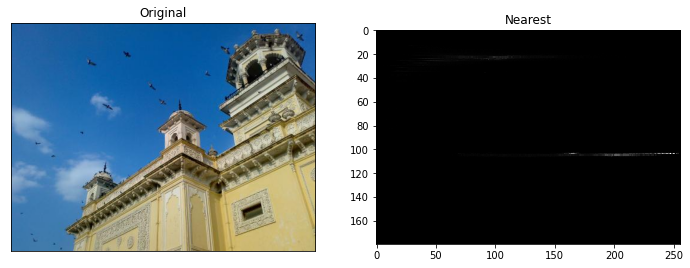

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('data/home.jpg')
hsv = cv.cvtColor(img,cv.COLOR_BGR2HSV)
hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )

plt.figure(figsize=(12, 6))

plt.subplot(121),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(hist,'gray', interpolation = 'nearest'),plt.title('Nearest')

plt.show()

上面是输入图像及其颜色直方图。X轴显示S值，Y轴显示色相。

在直方图中，您可以在H = 100和S = 200附近看到一些较高的值。它对应于天空的蓝色。同样，在H = 25和S = 100附近可以看到另一个峰值。它对应于宫殿的黄色。您可以使用GIMP等任何图像编辑工具进行验证。

#### 方法3：OpenCV示例样式

OpenCV-Python2示例中有一个颜色直方图的示例代码(samples / python / color_histogram.py)。如果运行代码，则可以看到直方图也显示了相应的颜色。或者简单地，它输出颜色编码的直方图。其结果非常好（尽管您需要添加额外的线束）。

在该代码中，作者在HSV中创建了一个颜色图。然后将其转换为BGR。将所得的直方图图像与此颜色图相乘。他还使用一些预处理步骤来删除小的孤立像素，从而获得良好的直方图。

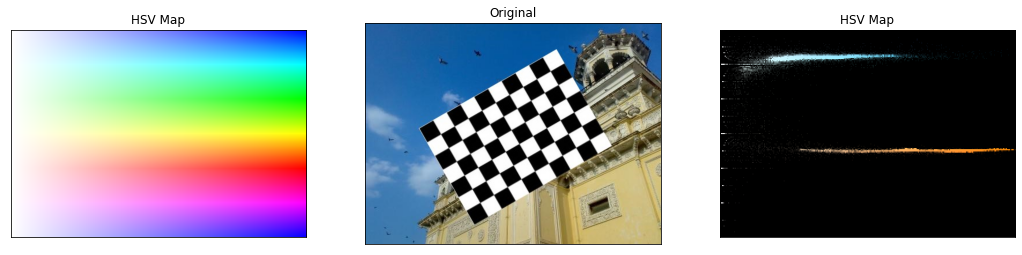

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

hsv_map = np.zeros((180, 256, 3), np.uint8)
h, s = np.indices(hsv_map.shape[:2])
hsv_map[:,:,0] = h
hsv_map[:,:,1] = s
hsv_map[:,:,2] = 255
hsv_map = cv.cvtColor(hsv_map, cv.COLOR_HSV2BGR)

img = cv.imread('data/home1.jpg')

small = cv.pyrDown(img)

hsv = cv.cvtColor(small, cv.COLOR_BGR2HSV)
dark = hsv[...,2] < 32
hsv[dark] = 0
h = cv.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

hist_scale = 10
h = np.clip(h*0.005*hist_scale, 0, 1)
vis = hsv_map*h[:,:,np.newaxis] / 255.0

plt.figure(figsize=(18, 6))

plt.subplot(131),plt.imshow(hsv_map),plt.title('HSV Map')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(vis),plt.title('HSV Map')
plt.xticks([]), plt.yticks([])

plt.show()

您可以在直方图中清楚地看到存在什么颜色，那里是蓝色，那里是黄色，并且由于棋盘的存在而有些白色。很好！

### 附加资源

### 练习